# Import the modules

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Web Scraping Using Selenium
#### Extracting Job Data from LinkedIn

In [4]:
# Set up the Chrome WebDriver
driver = webdriver.Chrome()

# Open the LinkedIn jobs search page
driver.get("https://www.linkedin.com/jobs/search?keywords=&location=%E7%BE%8E%E5%9C%8B&geoId=103644278&f_TPR=&f_E=1&position=1&pageNum=0")


pageNum = 0
while pageNum < 5:
    # Close any pop-up/modal using ESCAPE key
    webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()
    # Scroll to the bottom to load more jobs
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait for new jobs to load
    time.sleep(3)  
    pageNum += 1
    
    
# Find all elements with the class names
titleTags = driver.find_elements(By.CLASS_NAME, "base-search-card__title")
companyTags = driver.find_elements(By.CLASS_NAME, "base-search-card__subtitle")
locations = driver.find_elements(By.CLASS_NAME, "job-search-card__location")

# Collect the data into a list
job_data = []
for titleTag, companyTag, location in zip(titleTags, companyTags, locations):
    job_data.append([titleTag.text, companyTag.text, location.text])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(job_data, columns=["Title", "Company", "Location"])

# Close the browser window
driver.close()
df

Cache folder (/Users/hutingyu/.cache/selenium) cannot be created: Not a directory (os error 20)
Cache folder (/Users/hutingyu/.cache/selenium) cannot be created: Not a directory (os error 20)
Cache folder (/Users/hutingyu/.cache/selenium) cannot be created: Not a directory (os error 20)


,Title,Company,Location
0,Human Resources Intern,CELSIUS,"Boca Raton, FL"
1,Business Strategy & Insights Intern,CELSIUS,"Boca Raton, FL"
2,Finance Intern,CELSIUS,"Boca Raton, FL"
3,"Media Intern, NY",Van Cleef & Arpels,"New York, NY"
4,General Consideration,SCS Global Services,"Emeryville, CA"
...,...,...,...
105,Economics Researcher,Outlier,"Texas, United States"
106,Marketing Intern - 2025,Boys Lie,"Los Angeles, CA"
107,Psychology Researcher,Outlier,"Connecticut, United States"
108,Software Engineer Intern,Docusign,"Seattle, WA"


# Data Visualization 

## The Most Opportunity Internship Positions in US:
 
*- Business, Marketing, and Finance are the fields with the highest recruitment demand for internships.*  
*- If you're looking for internship opportunities, these fields are likely to offer the most potential.*

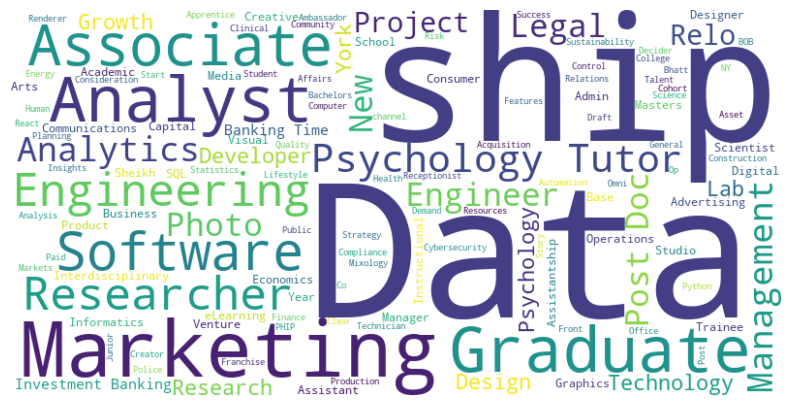

In [14]:
# List of words to remove
remove_words = ["Intern", "Summer", "Fall", "Development", 
                "Remote", "Undergraduate", "Hybrid", 
                "Full", "Spring", "High", "US", "Program"]
# Remove the specified words from the text
text_without = " ".join([title for title in df['Title']])
for word in remove_words:
    text_without = text_without.replace(word, "")

# Generate the word cloud with the cleaned text
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_without)

# Display the word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## The Most Opportunity Internship Citys in US:
 
*- New York and California (NY, CA) appear to have the highest concentration of internship opportunities.*  
*- Los Angeles and Pasadena also stand out, indicating a strong presence of internships in these locations.*  
*- Other notable locations include Texas, Florida, and North Carolina, which also have multiple opportunities.*  

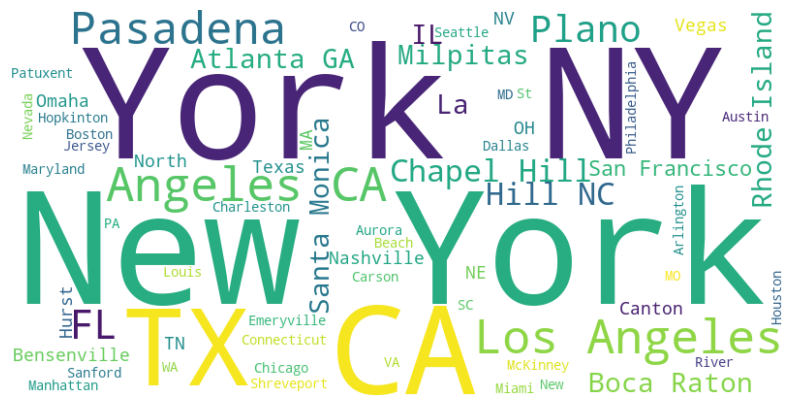

In [9]:
remove_words = ["United States"]

location_without = " ".join([location for location in df['Location']])
for word in remove_words:
    location_without = location_without.replace(word, "")

# Generate the word cloud with the cleaned text
location_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_without)

# Display the word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(location_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()